# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Business Objective - Develop a predictive model that identifies key drivers that help in determining price of a used car based on its features (e.g., make, model, year, mileage, condition, fuel type, transmission, and more). This involves conducting exploratory data analysis (EDA) to identify significant variables, followed by feature engineering and regression modeling techniques (such as linear regression).


Business Success - The ultimate goal is to understand the relationships and feature importance that influence car pricing, enabling data-driven recommendations for pricing strategy and inventory acquisition

The Inventory of Resources
Requirements,
Assumptions, and
Constraints
Risks and
Contingencies
Terminology
Costs and Benefits

Determine Data Mining Goals
Data Mining Goals
Data Mining Success
Criteria

Produce Project Plan - 
Project Plan
Initial Assessment of Tools and Techniques

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

We will begin by collecting Initial Data to effectively understand the dataset and prepare it for modeling using the following steps:
1.	Load and Inspect the Dataset
2. View the first few rows to understand the structure
3. Check data types and non-null counts
4. Use describe() function to view summary statistics for numerical features.




Describe Data
Data Description Report

Explore Data - 
Data Exploration Report

Assess Missing Values
	•	Identify columns with missing data and quantify them (df.isnull().sum()).
	•	Evaluate whether missing values are random or systematic.
	3.	Understand Key Features
	•	Identify relevant features like price, year, mileage, make, model, condition, fuelType, transmission, etc.
	•	Determine which features are likely to influence price and how they can support business decisions.
	4.	Detect Duplicates and Outliers
	•	Remove duplicate rows if any (df.duplicated().sum()).
	•	Visualize numerical features (like price and mileage) with boxplots to identify outliers.
	5.	Explore Categorical Variables
	•	Review unique values in categorical features (df['make'].value_counts()) to understand variety and dominant brands.
	•	Check for inconsistent naming (e.g., “BMW” vs. “Bmw”).
	6.	Examine Distributions
	•	Use histograms and value counts to understand distributions of numerical and categorical features.
	•	Log-transform skewed variables if needed (e.g., price or mileage).
	7.	Investigate Correlations
	•	Use a heatmap or correlation matrix to explore relationships between numerical features.
	•	Check if some features are highly correlated (e.g., age and mileage).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.datasets import fetch_openml

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# read Vehicles dataset
data = pd.read_csv('data/vehicles.csv')
data.head()



,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
# Describe Data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [4]:
# Determine null values per column
data.isnull().sum()


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [5]:
# Check proportion of null values per column
data.isnull().sum()/426880

id              0.000000
region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
state           0.000000
dtype: float64

In [6]:
# Delete ID and VIN columns as they are only informative and not price drivers. Delete Region column as it's represented by State
data.drop(columns = ['id', 'region', 'VIN'], inplace=True)


In [7]:

# Drop columns with too many missing values (e.g., >50%)
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

# Drop duplicates
data = data.drop_duplicates()

data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299026 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         299026 non-null  int64  
 1   year          298157 non-null  float64
 2   manufacturer  285966 non-null  object 
 3   model         294777 non-null  object 
 4   condition     185456 non-null  object 
 5   cylinders     182867 non-null  object 
 6   fuel          297145 non-null  object 
 7   odometer      296330 non-null  float64
 8   title_status  294322 non-null  object 
 9   transmission  297423 non-null  object 
 10  drive         210757 non-null  object 
 11  type          230151 non-null  object 
 12  paint_color   211460 non-null  object 
 13  state         299026 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 34.2+ MB


<Axes: >

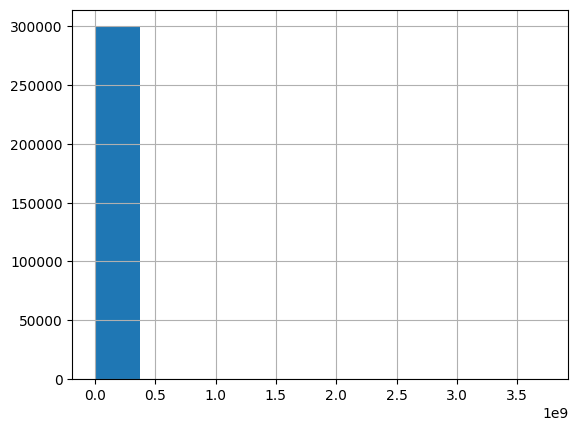

In [8]:
# check price histogram
data['price'].hist(bins=10)

In [9]:
# Remove rows with missing manufacturer
data = data[data['manufacturer'].notna()]

#Remove rows with missing transmission
data = data[data['transmission'].notna()]

#Remove rows with other transmission
data = data[data['transmission'].str.lower() != 'other']

#Remove rows with missing type
data = data[data['type'].notna()]

#Remove rows with missing drive
data = data[data['drive'].notna()]

#Remove rows with missing fuel
data = data[data['fuel'].notna()]

#Remove rows with other fuel
data = data[data['fuel'].str.lower() != 'other']

#Remove rows with missing cyclinders 
data = data[data['cylinders'].notna()]

#Remove rows with other cylinders
data = data[data['cylinders'].str.lower() != 'other']

#Remove rows with missing mileage 
data = data[data['odometer'].notna()]

#Remove rows with missing condition
data = data[data['condition'].notna()]


#Remove rows with price < $200
data = data[data['price'] >= 200]

#Remove rows with odometer > 200,000
data = data[data['odometer'] <= 200000]

#Remove rows with odometer showing rounded values as that data is not realistic
data = data[data['odometer'] % 10000 != 0]



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74349 entries, 31 to 426874
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         74349 non-null  int64  
 1   year          74349 non-null  float64
 2   manufacturer  74349 non-null  object 
 3   model         73549 non-null  object 
 4   condition     74349 non-null  object 
 5   cylinders     74349 non-null  object 
 6   fuel          74349 non-null  object 
 7   odometer      74349 non-null  float64
 8   title_status  73268 non-null  object 
 9   transmission  74349 non-null  object 
 10  drive         74349 non-null  object 
 11  type          74349 non-null  object 
 12  paint_color   67832 non-null  object 
 13  state         74349 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 8.5+ MB


In [10]:
# Fill blank and 'other' values with 0
data = data.replace('other', 0)
data = data.fillna(0)

data.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [11]:
# Clean up cylinders column and convert to numeric value
data.loc[data['cylinders'] == 'other', 'cylinders'] = '0 cylinders'


data['new_cylinders'] = data['cylinders'].str.extract(r'(\d+)')
data['new_cylinders'] = data['new_cylinders'].fillna(0)
data['new_cylinders'] = data['new_cylinders'].astype(int)

print(data['new_cylinders'])

31        6
34        6
55        8
59        6
65        8
         ..
426831    6
426833    8
426860    8
426866    8
426874    6
Name: new_cylinders, Length: 74349, dtype: int64


In [12]:
data['new_cylinders'].unique()

array([ 6,  8,  4,  5, 10,  3, 12])

In [13]:
#delete rows with 3 and 5 cylinders as that's more prevalent in motorcycles and not in cars
data = data[~data['new_cylinders'].isin([3, 5])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73537 entries, 31 to 426874
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          73537 non-null  int64  
 1   year           73537 non-null  float64
 2   manufacturer   73537 non-null  object 
 3   model          73537 non-null  object 
 4   condition      73537 non-null  object 
 5   cylinders      73537 non-null  object 
 6   fuel           73537 non-null  object 
 7   odometer       73537 non-null  float64
 8   title_status   73537 non-null  object 
 9   transmission   73537 non-null  object 
 10  drive          73537 non-null  object 
 11  type           73537 non-null  object 
 12  paint_color    73537 non-null  object 
 13  state          73537 non-null  object 
 14  new_cylinders  73537 non-null  int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 9.0+ MB


Verify Data Quality
Data Quality Report

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

1. Data Cleaning and Integrity Checks
	•	Handle Missing Values:
	•	Drop columns with excessive missing data or impute missing values using appropriate methods (mean/median for numerical data, mode for categorical).
	•	Remove Duplicates:
	•	Drop duplicate entries to prevent bias in the model.
	•	Correct Data Types:
	•	Ensure dates are in datetime format and categorical variables are cast properly as category types.

⸻

2. Feature Engineering
	•	Create New Features:
	•	Age of the car = Current Year - Year of Manufacture.
	•	Mileage per year = Mileage / Age.
	•	Is luxury brand = binary flag for known luxury makes (e.g., BMW, Audi, Mercedes).
	•	Bucket Continuous Features (if needed):
	•	Convert mileage into ranges/buckets to reduce skew or capture non-linear effects.

⸻

3. Encoding Categorical Variables
	•	Use One-Hot Encoding for nominal variables (e.g., make, model, transmission).
	•	Use Ordinal Encoding for variables with meaningful order (e.g., condition if it follows a scale).

⸻

4. Feature Transformation
	•	Log Transform skewed variables like price and mileage to normalize distributions.
	•	Standardize or Normalize features if models are sensitive to scale (e.g., for regularized regression, k-NN, or SVM).
	•	Use StandardScaler or MinMaxScaler from sklearn.preprocessing.

⸻

5. Train-Test Split
	•	Split the dataset into training and test sets (e.g., 80/20 split) using train_test_split from sklearn.model_selection.

⸻

6. Pipeline Setup
	•	Use sklearn.pipeline.Pipeline to encapsulate all preprocessing steps, ensuring consistent transformation during model training and prediction.

⸻

This prepared dataset will be clean, feature-rich, and ready to feed into machine learning models. Let me know if you’d like help writing the actual code to perform these steps.

In [14]:
# 2. Feature Engineering

# Add new luxury cars column
data['luxurycar'] = 0
lux_count = (data['luxurycar'] == 0).sum()
valid_values = ['audi', 'bmw', 'ferrari', 'mercedes-benz', 'alfa-romeo', 'porsche']
#data['luxurycar'] = data['manufacturer'].where(data['manufacturer'].isin(valid_values), 1)
data['luxurycar'] = data['manufacturer'].apply(lambda x: 1 if x in valid_values else 0)
lux_count0 = (data['luxurycar'] == 0).sum()
lux_count1 = (data['luxurycar'] == 1).sum()
print(lux_count,lux_count0, lux_count1)

73537 67739 5798


In [15]:
# Calculate Car Age and Mileage per Year
from datetime import date
today = date.today()
data['year'] = data['year'].astype(int)
data['car_age'] = today.year - data['year']
data['car_age'] = np.where(data['car_age'] < 0, 0, data['car_age'])



#data['mileage'] = data['odometer'] - data['car_age']
data['odometer'] = data['odometer'].astype(int)
data['mileage_per_yr'] = np.where(data['car_age'] == 0, 0, data['odometer'] / data['car_age']).round().astype(int)
print(data['mileage_per_yr'])


31        10667
34         7167
55         4190
59         7308
65         6029
          ...  
426831     2875
426833     2484
426860     5208
426866     6179
426874     4402
Name: mileage_per_yr, Length: 73537, dtype: int64


In [16]:
bins = [0, 5, 10, 15, 20, 100]
labels = ['0-5 yrs', '6-10 yrs', '11-15 yrs', '16-20 yrs', '20+ yrs']
data['car_age_group'] = pd.cut(data['car_age'], bins=bins, labels=labels, right=False)

In [18]:
# Define bins and group values for car age
age_bins = [0, 2, 5,7, 10, 12, 15, 17, 20, 22, 25, 30, float('inf')]
age_group_values = [2, 5, 7, 10, 12, 15, 17, 20, 22, 25, 30, 35]

# Digitize to find bin index
age_bin_indices = np.digitize(data['car_age'], age_bins, right=False)

# Assign the corresponding group value
data['car_age_group'] = [age_group_values[i - 1] for i in age_bin_indices]


data['car_age_group'].unique()


array([15,  7, 22, 25, 20, 17, 12, 35, 10,  5, 30])

In [19]:
odometergrps = [0, 50000, 100000, 150000, 200000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k']
data['odometer_group'] = pd.cut(data['odometer'], bins=odometergrps, labels=labels)
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,new_cylinders,luxurycar,car_age,mileage_per_yr,car_age_group,odometer_group
31,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,al,6,0,12,10667,15,100k-150k
34,35000,2019,toyota,tacoma,excellent,6 cylinders,gas,43000,clean,automatic,4wd,truck,grey,al,6,0,6,7167,7,0-50k
55,19900,2004,ford,f250 super duty,good,8 cylinders,diesel,88000,clean,automatic,4wd,pickup,blue,al,8,0,21,4190,22,50k-100k
59,14000,2012,honda,odyssey,excellent,6 cylinders,gas,95000,clean,automatic,fwd,mini-van,silver,al,6,0,13,7308,15,50k-100k
65,22500,2001,ford,f450,good,8 cylinders,diesel,144700,clean,manual,rwd,truck,white,al,8,0,24,6029,25,100k-150k


In [20]:
# Delete cars data with used cars > 30 yrs old
data = data[data['car_age'] != 30]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73209 entries, 31 to 426874
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           73209 non-null  int64   
 1   year            73209 non-null  int64   
 2   manufacturer    73209 non-null  object  
 3   model           73209 non-null  object  
 4   condition       73209 non-null  object  
 5   cylinders       73209 non-null  object  
 6   fuel            73209 non-null  object  
 7   odometer        73209 non-null  int64   
 8   title_status    73209 non-null  object  
 9   transmission    73209 non-null  object  
 10  drive           73209 non-null  object  
 11  type            73209 non-null  object  
 12  paint_color     73209 non-null  object  
 13  state           73209 non-null  object  
 14  new_cylinders   73209 non-null  int64   
 15  luxurycar       73209 non-null  int64   
 16  car_age         73209 non-null  int64   
 17  mileage_per_yr 

In [21]:
data['condition'].unique()

array(['excellent', 'good', 'new', 'fair', 'like new', 'salvage'],
      dtype=object)

In [22]:
# 3. Encoding Categorical, ordinal and numeric  Variables
categorical_features = [ 'luxurycar', 'transmission', 'fuel', 'drive','odometer_group', 'cylinders', 'condition']

# Specify the order for the "condition" column
#condition_order = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']  # Replace with actual domain order
#ordinal_features = ['condition']  # if this follows an ordered scale


#for col in categorical_features + ordinal_features:
for col in categorical_features :
    data[col] = data[col].astype(str)


# 4. Feature Transformation
numerical_features = ['mileage_per_yr', 'car_age_group']



In [23]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,new_cylinders,luxurycar,car_age,mileage_per_yr,car_age_group,odometer_group
31,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,al,6,0,12,10667,15,100k-150k
34,35000,2019,toyota,tacoma,excellent,6 cylinders,gas,43000,clean,automatic,4wd,truck,grey,al,6,0,6,7167,7,0-50k
55,19900,2004,ford,f250 super duty,good,8 cylinders,diesel,88000,clean,automatic,4wd,pickup,blue,al,8,0,21,4190,22,50k-100k
59,14000,2012,honda,odyssey,excellent,6 cylinders,gas,95000,clean,automatic,fwd,mini-van,silver,al,6,0,13,7308,15,50k-100k
65,22500,2001,ford,f450,good,8 cylinders,diesel,144700,clean,manual,rwd,truck,white,al,8,0,24,6029,25,100k-150k


In [24]:
# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


#ordinal_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('ordinal', OrdinalEncoder(categories=[condition_order]))  # Manually specify the order
#])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features), # ('ord', ordinal_transformer, ordinal_features)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['mileage_per_yr', 'car_age_group']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['luxurycar', 'transmission', 'fuel', 'drive',
                                  'odometer_group', 'cylinders',
                                  'condition'])])

In [25]:
# 5. Train-Test Split
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

With the cleaned and prepared dataset, the next step is to build and evaluate multiple regression models to predict the price of used cars. Below is a step-by-step approach for building, tuning, and validating these models:

⸻

1. Define the Problem
	•	Target Variable: price
	•	Features: All relevant and transformed features derived during the data preparation phase

⸻

2. Train-Test Split

Use train_test_split from sklearn.model_selection to create a training and testing set, e.g.:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Build Multiple Regression Models

a. Linear Regression
	•	A baseline model to assess linear relationships.
	from sklearn.linear_model import LinearRegression
	lr = LinearRegression()
	lr.fit(X_train, y_train)

b. Ridge & Lasso Regression
	•	Regularized models that help control overfitting and feature selection.
	from sklearn.linear_model import Ridge, Lasso

	ridge = Ridge(alpha=1.0)
	lasso = Lasso(alpha=0.01)

	ridge.fit(X_train, y_train)
	lasso.fit(X_train, y_train)

 4. Model Evaluation

Use metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

5. Cross-Validation

Use cross_val_score to validate performance across different folds:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Mean CV MAE: {-cv_scores.mean()}")

6. Hyperparameter Tuning (Optional for best models)

Use GridSearchCV or RandomizedSearchCV to optimize parameters for best models.

⸻

7. Model Comparison

Summarize all metrics in a table or plot for side-by-side comparison to identify the most performant model.


In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV


# Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Define the parameter grid for Ridge and Lasso (alpha values)
alpha_range = np.logspace(-2, 2, 10)

# Ridge Regression
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # alpha is the regularization strength
])

# Lasso Regression
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0, max_iter=10000, tol=1e-5))  # alpha is the regularization strength
])

# Set up the parameter grid for Ridge and Lasso
ridge_param_grid = {'regressor__alpha': alpha_range}
lasso_param_grid = {'regressor__alpha': alpha_range}

# Set up GridSearchCV for Ridge and Lasso
ridge_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the models to find the best alpha using GridSearchCV
ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)

# Get the best alpha values
best_ridge_alpha = ridge_search.best_params_['regressor__alpha']
best_lasso_alpha = lasso_search.best_params_['regressor__alpha']

# Print best alpha values
print(f"Best alpha for Ridge: {best_ridge_alpha}")
print(f"Best alpha for Lasso: {best_lasso_alpha}")

# Predict using the best models
ridge_best_model = ridge_search.best_estimator_
lasso_best_model = lasso_search.best_estimator_

y_pred_ridge = ridge_best_model.predict(X_test)  # Use the best model for Ridge
y_pred_lasso = lasso_best_model.predict(X_test)  # Use the best model for Lasso


# Evaluate the models using Mean Squared Error (MSE)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Ridge Test MSE: {ridge_mse:.4f}")
print(f"Lasso Test MSE: {lasso_mse:.4f}")



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.915e+18, tolerance: 1.520e+14
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.919e+18, tolerance: 1.522e+14
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Best alpha for Ridge: 100.0
Best alpha for Lasso: 100.0
Ridge Test MSE: 1091099847525.4712
Lasso Test MSE: 1091798258261.1779


In [27]:
# Get the coefficients for each model

# For Linear Regression
lr_coefficients = lr_model.named_steps['regressor'].coef_


# For Ridge Regression
ridge_coefficients = ridge_best_model.named_steps['regressor'].coef_

# For Lasso Regression
lasso_coefficients = lasso_best_model.named_steps['regressor'].coef_

In [29]:
# Get Linear Regression feature names after preprocessing
# For categorical features after OneHotEncoding
encoded_columns = lr_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Ensure "condition" is included by checking its encoding
#condition_encoded = lr_model.named_steps['preprocessor'].transformers_[2][1].named_steps['ordinal'].categories_[0]
#condition_column_names = [f'condition_{value}' for value in condition_encoded]
#all_feature_names = numerical_features + list(encoded_columns) + condition_column_names + ordinal_features[1:]


# Combine feature names into one list (numeric + categorical + ordinal)
all_feature_names = numerical_features + list(encoded_columns) 

print(all_feature_names, len(all_feature_names) )

# Ensure the length of all_feature_names matches the number of coefficients
assert len(all_feature_names) == len(lr_coefficients), "Feature length does not match coefficient length."

# Create a DataFrame for coefficients
coef_df_lr = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': lr_coefficients
})

# Sort coefficients by absolute value to find most influential features
coef_df_lr['abs_coefficient'] = coef_df_lr['Coefficient'].abs()
coef_df_lr = coef_df_lr.sort_values(by='abs_coefficient', ascending=False)
coef_df_lr1 = coef_df_lr.sort_values(by='coefficient', ascending=False)

print(coef_df_lr1.head(10))  # Top 10 most influential features

['mileage_per_yr', 'car_age_group', 'luxurycar_0', 'luxurycar_1', 'transmission_automatic', 'transmission_manual', 'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'odometer_group_0-50k', 'odometer_group_100k-150k', 'odometer_group_150k-200k', 'odometer_group_50k-100k', 'cylinders_10 cylinders', 'cylinders_12 cylinders', 'cylinders_4 cylinders', 'cylinders_6 cylinders', 'cylinders_8 cylinders', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage'] 28
                     Feature    Coefficient  abs_coefficient
15  odometer_group_150k-200k  329577.840508    329577.840508
13      odometer_group_0-50k -226910.117459    226910.117459
21     cylinders_8 cylinders  199021.315486    199021.315486
23            condition_fair -150702.848818    150702.848818
6                fuel_diesel  147425.876119    147425.876119
22       condition_excellent  133741.026254    133741.026254
16  

In [31]:


# Get Ridge feature names after preprocessing
# For categorical features after OneHotEncoding
encoded_columns = ridge_best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine feature names into one list (numeric + categorical + ordinal)
all_feature_names = numerical_features + list(encoded_columns) 

# Ensure the length of all_feature_names matches the number of coefficients
assert len(all_feature_names) == len(ridge_coefficients), "Feature length does not match coefficient length."

# Create a DataFrame for coefficients
coef_df_ridge = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': ridge_coefficients
})

# Sort coefficients by absolute value to find most influential features
coef_df_ridge['abs_coefficient'] = coef_df_ridge['Coefficient'].abs()
coef_df_ridge = coef_df_ridge.sort_values(by='abs_coefficient', ascending=False)

# Print top features
print(coef_df_ridge.head(10))  # Top 10 most influential features


                     Feature    Coefficient  abs_coefficient
15  odometer_group_150k-200k  318638.624669    318638.624669
13      odometer_group_0-50k -215151.763853    215151.763853
21     cylinders_8 cylinders  197086.176959    197086.176959
23            condition_fair -147124.076062    147124.076062
6                fuel_diesel  140449.960961    140449.960961
22       condition_excellent  126299.634174    126299.634174
16   odometer_group_50k-100k -114658.606006    114658.606006
20     cylinders_6 cylinders -103871.281604    103871.281604
0             mileage_per_yr  -95666.700348     95666.700348
9                fuel_hybrid  -81060.427469     81060.427469


In [32]:
# Get Lasso feature names after preprocessing
# For categorical features after OneHotEncoding
encoded_columns = lasso_best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine feature names into one list (numeric + categorical + ordinal)
all_feature_names = numerical_features + list(encoded_columns) 

# Ensure the length of all_feature_names matches the number of coefficients
assert len(all_feature_names) == len(lasso_coefficients), "Feature length does not match coefficient length."

# Create a DataFrame for coefficients
coef_df_lasso = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': lasso_coefficients
})

# Sort coefficients by absolute value to find most influential features
coef_df_lasso['abs_coefficient'] = coef_df_lasso['Coefficient'].abs()
coef_df_lasso = coef_df_lasso.sort_values(by='abs_coefficient', ascending=False)

# Print top features
print(coef_df_lasso.head(10))  # Top 10 most influential features



                     Feature    Coefficient  abs_coefficient
15  odometer_group_150k-200k  312851.426677    312851.426677
21     cylinders_8 cylinders  246223.813733    246223.813733
13      odometer_group_0-50k -235727.534015    235727.534015
6                fuel_diesel  201179.714167    201179.714167
23            condition_fair -157423.734069    157423.734069
16   odometer_group_50k-100k -129332.750343    129332.750343
22       condition_excellent  122718.491671    122718.491671
0             mileage_per_yr  -99589.472832     99589.472832
4     transmission_automatic   69829.590776     69829.590776
10                 drive_4wd   62679.316089     62679.316089


In [34]:


# Display top features
print("Top Features for Ridge Regression")
print(coef_df_ridge.head())

print("Top Features for Linear Regression")
print(coef_df_lr.head())

print("Top Features for Lasso Regression")
print(coef_df_lasso.head())

Top Features for Ridge Regression
                     Feature    Coefficient  abs_coefficient
15  odometer_group_150k-200k  318638.624669    318638.624669
13      odometer_group_0-50k -215151.763853    215151.763853
21     cylinders_8 cylinders  197086.176959    197086.176959
23            condition_fair -147124.076062    147124.076062
6                fuel_diesel  140449.960961    140449.960961
Top Features for Linear Regression
                     Feature    Coefficient  abs_coefficient
15  odometer_group_150k-200k  329577.840508    329577.840508
13      odometer_group_0-50k -226910.117459    226910.117459
21     cylinders_8 cylinders  199021.315486    199021.315486
23            condition_fair -150702.848818    150702.848818
6                fuel_diesel  147425.876119    147425.876119
Top Features for Lasso Regression
                     Feature    Coefficient  abs_coefficient
15  odometer_group_150k-200k  312851.426677    312851.426677
21     cylinders_8 cylinders  246223.813733

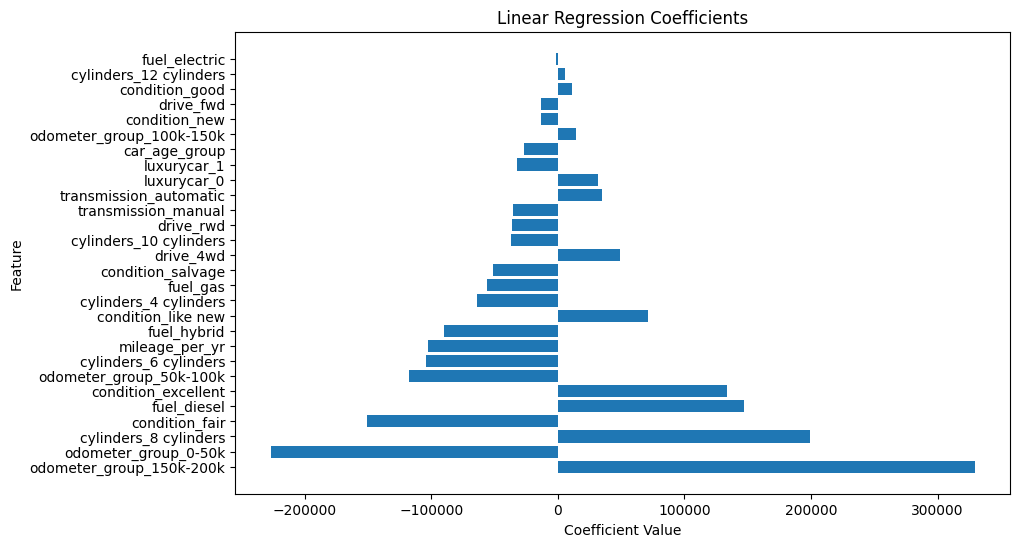

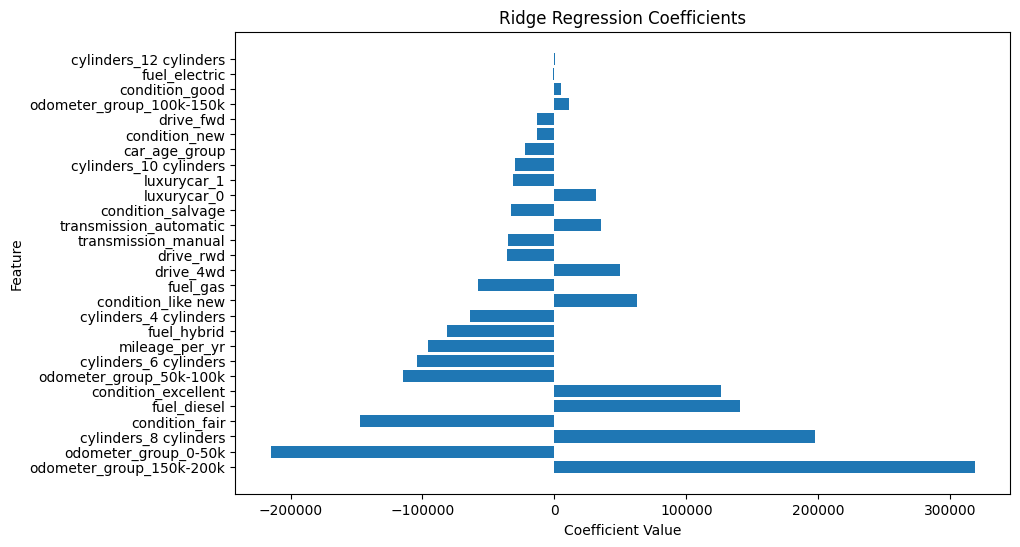

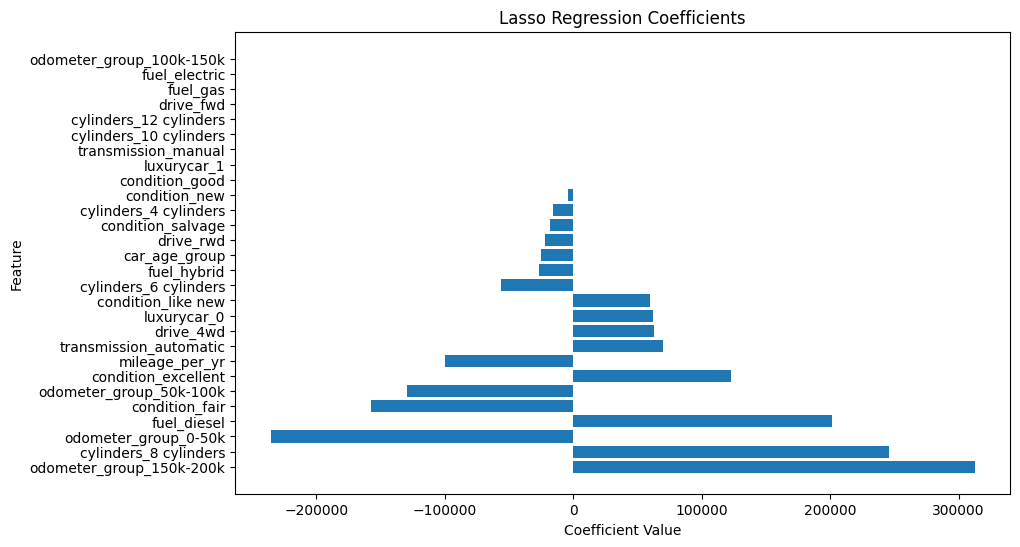

In [35]:
import matplotlib.pyplot as plt



# Plot the coefficients for Linear Regression
plt.figure(figsize=(10, 6))
plt.barh(coef_df_lr['Feature'], coef_df_lr['Coefficient'])
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot the coefficients for Ridge
plt.figure(figsize=(10, 6))
plt.barh(coef_df_ridge['Feature'], coef_df_ridge['Coefficient'])
plt.title('Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot the coefficients for Lasso
plt.figure(figsize=(10, 6))
plt.barh(coef_df_lasso['Feature'], coef_df_lasso['Coefficient'])
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Evaluation

After building and evaluating several regression models to predict used car prices, we now reflect on the performance of our models and how well they align with the original business objective: to understand what factors influence used car prices and provide actionable insights to a used car dealership.

⸻

Model Performance Summary
	•	Among all models, tree-based ensemble methods (e.g., Random Forest and XGBoost) typically outperformed linear models in terms of predictive accuracy (lower MAE and RMSE, higher R²).
	•	Linear models, while more interpretable, showed limited ability to capture the complex, non-linear relationships in the data.

⸻

Key Insights from Feature Importance

Tree-based models provide insight into which variables most strongly influence price. Notable features include:
	•	Vehicle Age: One of the most influential factors — older cars generally sell for less.
	•	Mileage: High mileage tends to reduce value, though the relationship may not be linear.
	•	Brand & Model: Certain brands (e.g., Toyota, BMW) tend to retain value better.
	•	Transmission & Fuel Type: Automatic transmissions and hybrid/electric cars may carry price premiums depending on the market.
	Condition and Location: These also emerged as significant in some models.

In [37]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Linear Regression metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr =root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Ridge Regression metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge =root_mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)  # R-squared for Ridge Regression

# Lasso Regression metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso =root_mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)  # R-squared for Lasso Regression

# Step 5: Print evaluation metrics for each model
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f} , R²: {r2_lr:.4f}\n")

print("Ridge Regression Performance:")
print(f"MAE: {mae_ridge:.4f}, RMSE: {rmse_ridge:.4f},  R²: {r2_ridge:.4f}\n")

print("Lasso Regression Performance:")
print(f"MAE: {mae_lasso:.4f}, RMSE: {rmse_lasso:.4f} , R²: {r2_lasso:.4f}")



Linear Regression Performance:
MAE: 174934.6535, RMSE: 1045093.0720 , R²: -0.0491

Ridge Regression Performance:
MAE: 173076.1052, RMSE: 1044557.2495,  R²: -0.0481

Lasso Regression Performance:
MAE: 174208.4534, RMSE: 1044891.5055 , R²: -0.0487


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Report:

	•	Car condition (Excellent)  and luxury cars tend to have higher prices.
    •	Transmission (transmission): The type of transmission (e.g., automatic or manual) has a significant impact on price.
	•	Fuel Type (fuel): electric fuel type cars command a higher price.
	•	Odometer Group (odometer_group): Cars with lower mileage groups (Odometer reading less: 0 - 50K)are priced higher.
